In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47
1.5697304993937262 89.93893258822354


C:\Users\Mañanas\AppData\Local\Temp\ipykernel_9316\2778523300.py:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  angulo_radianes = math.atan(pendiente)


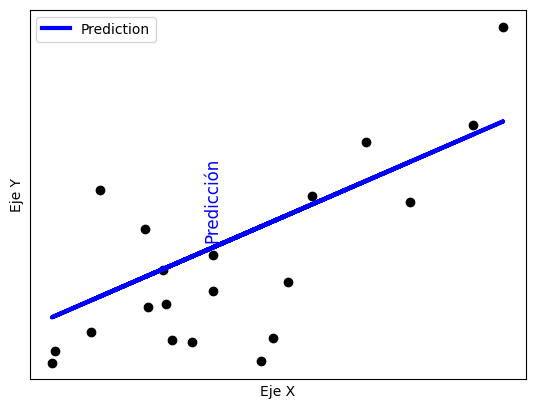

In [4]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3, label="Prediction")

plt.xticks(())
plt.yticks(())

plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()

x_final = diabetes_X_test[5]-0.025
y_final = diabetes_y_pred[10]-30

x1, y1 = diabetes_X_test[0], diabetes_y_pred[0] 
x2, y2 = diabetes_X_test[-1], diabetes_y_pred[-1]
pendiente = (y2 - y1) / (x2 - x1)
angulo_radianes = math.atan(pendiente)
angulo_grados = math.degrees(angulo_radianes)
print(angulo_radianes, angulo_grados)
# Agregar la etiqueta encima de la línea
plt.text(x_final, y_final, 'Predicción', color='blue', fontsize=12, rotation=angulo_grados, verticalalignment='center')

plt.show()
